<a href="https://colab.research.google.com/github/ChirahCasper/DataAnalysiswithpython/blob/main/CLV_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

Data Cleaning

In [ ]:
df = pd.read_csv('CLVAnlysisDataset.csv')


# Preview the Dataset
pd.set_option('display.max_columns', None)  # Show all columns
print("Preview of the dataset:")
print(df.head())

#  Business Analysis
print("\nBasic Statistics:")
print(df.describe(include='all'))

print("\nMissing Values in Each Column:")
print(df.isnull().sum())

<ipython-input-6-10761c42720f>:1: DtypeWarning: Columns (10,13,14,18,19,20,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('CLVAnlysisDataset.csv')


Preview of the dataset:
   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  \
0                          2               0                 3      8370   
1                          2               0                 1     15200   
2                          2               0                12      1422   
3                          2               0                12      1057   
4                         4+               0                 8      7969   

         Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
0  02/01/2016       2547.0             1.0          X52  0

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)
print("\nData cleaned. Remaining missing values:")
print(df.isnull().sum())

<ipython-input-7-c2d9866723aa>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-7-c2d9866723aa>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd


Data cleaned. Remaining missing values:
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category                   0
Purchase                           0
Date                               0
Customer_ID                        0
Transaction_ID                     0
SKU_Category                       0
SKU                                0
Quantity                           0
Sales_Amount                       0
Unnamed: 17                   550068
Coverage                           0
Education                          0
EmploymentStatus                   0
Income                             0
Location.Geo                       0
Location.Code                      0
Marital.Status                     0
dtype: int64


Exploratory Data Analysis (EDA)

Dataset columns and types:
User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category                int64
Purchase                        int64
Date                           object
Customer_ID                   float64
Transaction_ID                float64
SKU_Category                   object
SKU                            object
Quantity                      float64
Sales_Amount                  float64
Unnamed: 17                   float64
Coverage                       object
Education                      object
EmploymentStatus               object
Income                        float64
Location.Geo                   object
Location.Code                  object
Marital.Status                 object
dtype: object


<ipython-input-10-cf462493bd11>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


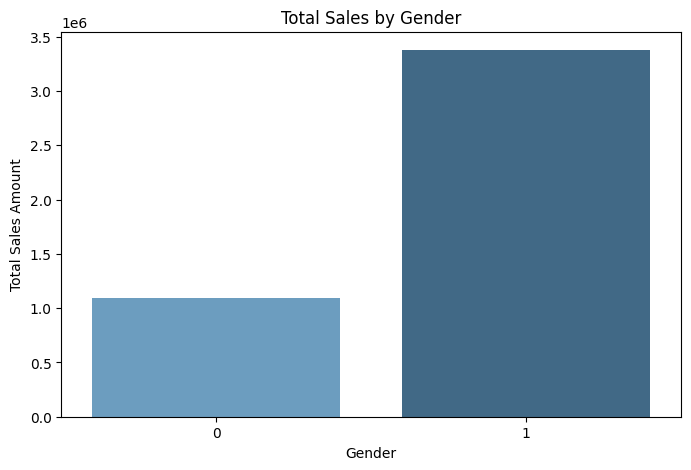

<ipython-input-10-cf462493bd11>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


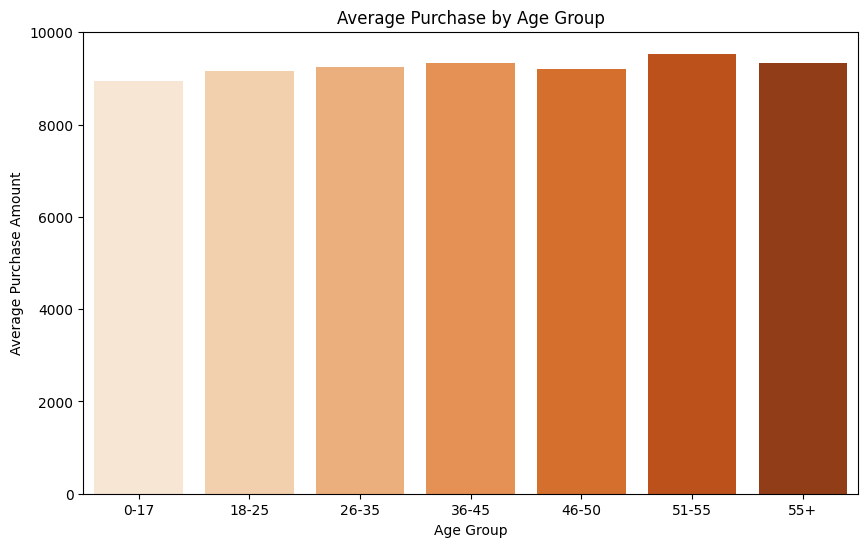

<ipython-input-10-cf462493bd11>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


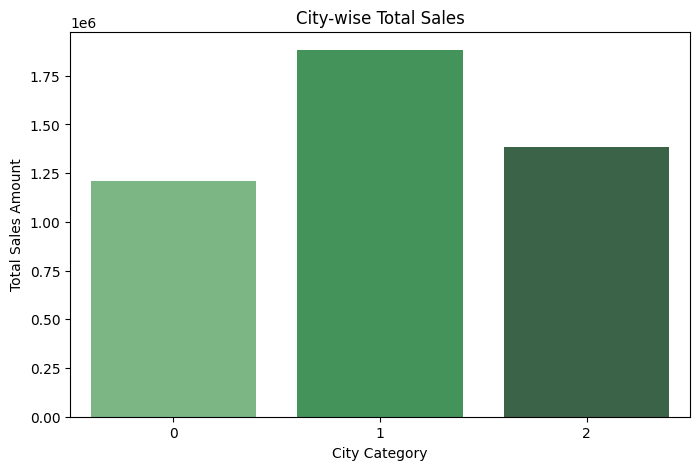

<ipython-input-10-cf462493bd11>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


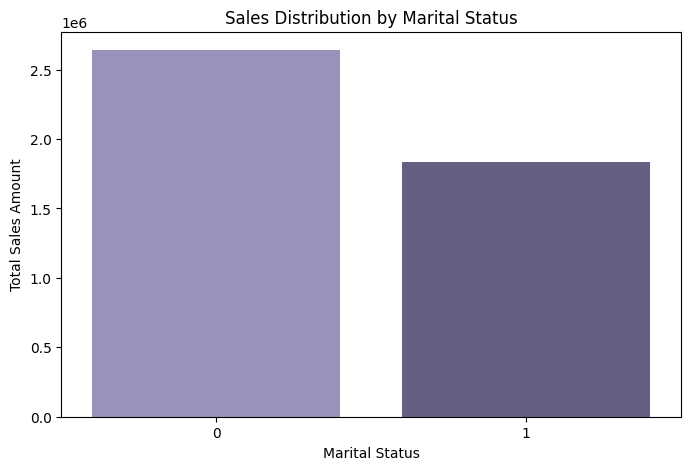

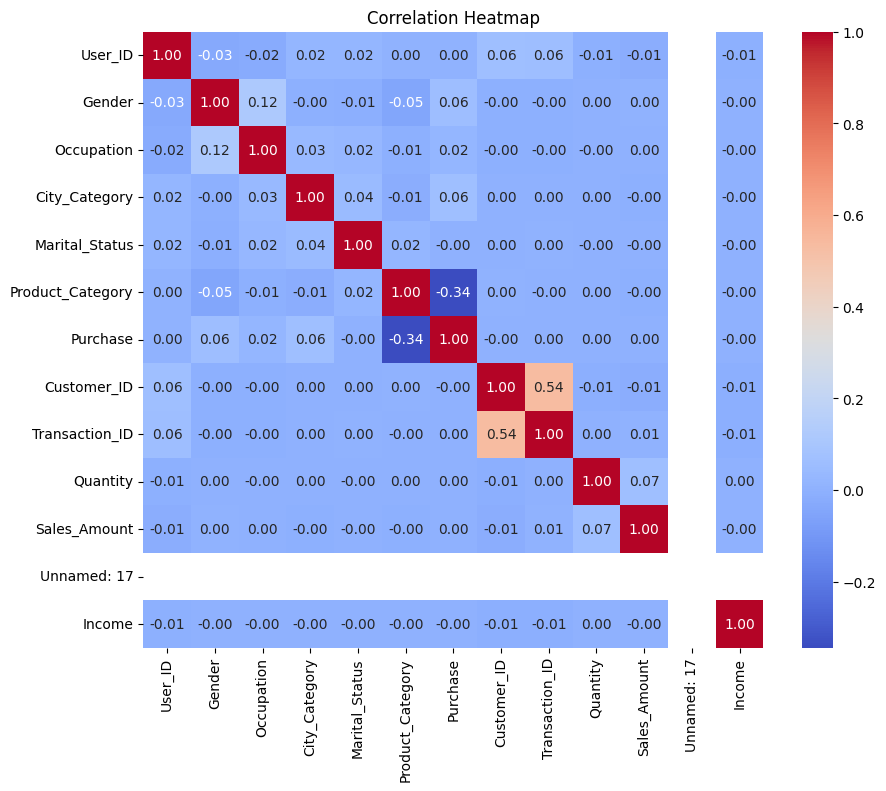

In [ ]:
# Inspect the dataset to identify issues
print("Dataset columns and types:")
print(df.dtypes)

# Ensure necessary columns are available
required_columns = ['Gender', 'Sales_Amount', 'Age', 'Purchase', 'City_Category', 'Marital_Status']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
    raise KeyError("Required columns are missing. Please verify your dataset.")

# Convert categorical columns to numerical where applicable
df['Gender'] = df['Gender'].astype('category').cat.codes  # Encode Gender (e.g., Male: 0, Female: 1)
df['City_Category'] = df['City_Category'].astype('category').cat.codes  # Encode City_Category
df['Marital_Status'] = df['Marital_Status'].astype(int)  # Ensure it's numerical

# Remove non-numerical columns from correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Handle missing values (if any)
numerical_df = numerical_df.fillna(0)  # Replace NaN with 0 or choose a suitable strategy

# 5.1 Total Sales by Gender
plt.figure(figsize=(8, 5))
sns.barplot(
    x=df.groupby('Gender')['Sales_Amount'].sum().index,
    y=df.groupby('Gender')['Sales_Amount'].sum().values,
    palette="Blues_d"
)
plt.title("Total Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales Amount")
plt.show()

# 5.2 Average Purchase by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(
    x=df.groupby('Age')['Purchase'].mean().index,
    y=df.groupby('Age')['Purchase'].mean().values,
    palette="Oranges"
)
plt.title("Average Purchase by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount")
plt.show()

# 5.3 City-wise Sales
plt.figure(figsize=(8, 5))
sns.barplot(
    x=df.groupby('City_Category')['Sales_Amount'].sum().index,
    y=df.groupby('City_Category')['Sales_Amount'].sum().values,
    palette="Greens_d"
)
plt.title("City-wise Total Sales")
plt.xlabel("City Category")
plt.ylabel("Total Sales Amount")
plt.show()

# 5.4 Sales Distribution by Marital Status
plt.figure(figsize=(8, 5))
sns.barplot(
    x=df.groupby('Marital_Status')['Sales_Amount'].sum().index,
    y=df.groupby('Marital_Status')['Sales_Amount'].sum().values,
    palette="Purples_d"
)
plt.title("Sales Distribution by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Total Sales Amount")
plt.show()

# 5.5 Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


Predictive Analysis (Random Forest)

<ipython-input-16-fe49e23b33e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_per_Transaction'] = df['Sales_Amount'] / df['Quantity']
<ipython-input-16-fe49e23b33e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income_to_Sales'] = df['Income'] / df['Sales_Amount']



Random Forest Model Evaluation:
R-squared Score: -0.02
Mean Squared Error: 25890118.04


<ipython-input-16-fe49e23b33e1>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="Spectral")


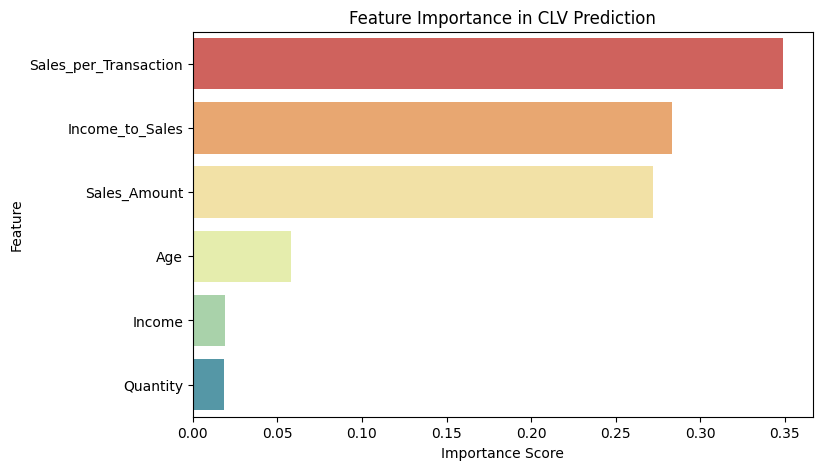

In [ ]:
# Adding New Features
df['Sales_per_Transaction'] = df['Sales_Amount'] / df['Quantity']
df['Income_to_Sales'] = df['Income'] / df['Sales_Amount']

# Feature Selection
features = ['Age', 'Income', 'Quantity', 'Sales_Amount', 'Sales_per_Transaction', 'Income_to_Sales']
X = df[features]
y = df['Purchase']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction and Evaluation
y_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print("\nRandom Forest Model Evaluation:")
print(f"R-squared Score: {r2_score(y_test, y_pred_rf):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.2f}")

# Feature Importance Visualization
feature_importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="Spectral")
plt.title("Feature Importance in CLV Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()



 Clustering for Customer Segmentation

<ipython-input-13-fe347e560b50>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(X_scaled)


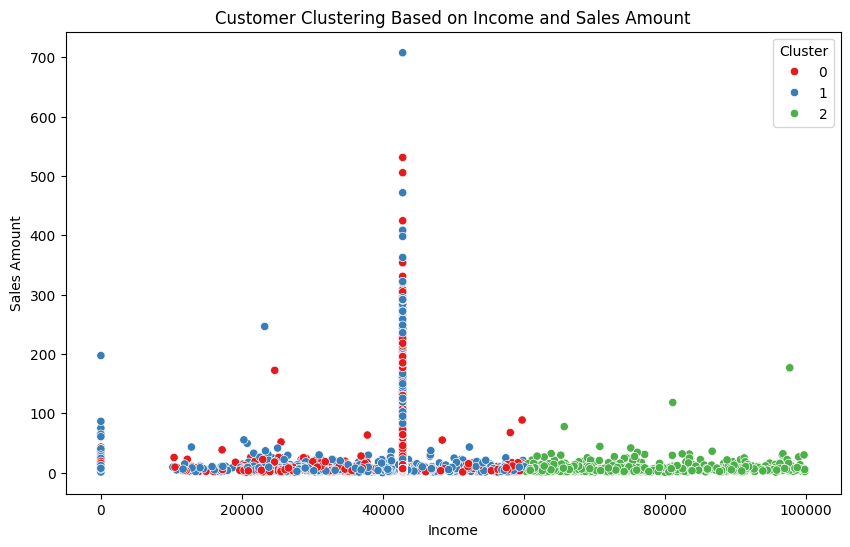


Cluster Summary:
               Income  Sales_Amount  Quantity
Cluster                                      
0        42791.559896      8.126175  1.117161
1        42793.212990      8.134442  1.116149
2        77749.649402      8.706474  1.387470


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Income'], y=df['Sales_Amount'], hue=df['Cluster'], palette='Set1')
plt.title("Customer Clustering Based on Income and Sales Amount")
plt.xlabel("Income")
plt.ylabel("Sales Amount")
plt.legend(title="Cluster")
plt.show()

# Recommendations
print("\nCluster Summary:")
print(df.groupby('Cluster')[['Income', 'Sales_Amount', 'Quantity']].mean())